In [11]:
import numpy as np
from gcs_for_blocks.gcs_in_out import GCSforBlocksOneInOneOut

from pydrake.geometry.optimization import Point, HPolyhedron
from pydrake.geometry.optimization import Iris
from pydrake.solvers import MathematicalProgram, Solve
from pydrake.math import ge

In [13]:
prog = MathematicalProgram()
r = prog.NewContinuousVariables(1, "r")[0]
s = prog.NewContinuousVariables(1, "s")[0]
A = np.array( [[-(3-1), -1], [-1, 0], [0, 1]] )
b = np.array( [0, 0, 3-1] )
prog.AddLinearConstraint( ge(A @ np.array([r,s]), b) )
# prog.AddLinearConstraint( A @ np.array([r,s]) <= b )

array([<Formula "(( - 2 * r(0) - s(0)) >= 0)">,
       <Formula "((-1 * r(0)) >= 0)">, <Formula "(s(0) >= 2)">],
      dtype=object)

In [1]:
print(sum([]))

0


Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25
Set parameter Username
Academic license - for non-commercial use only - expires 2023-10-25

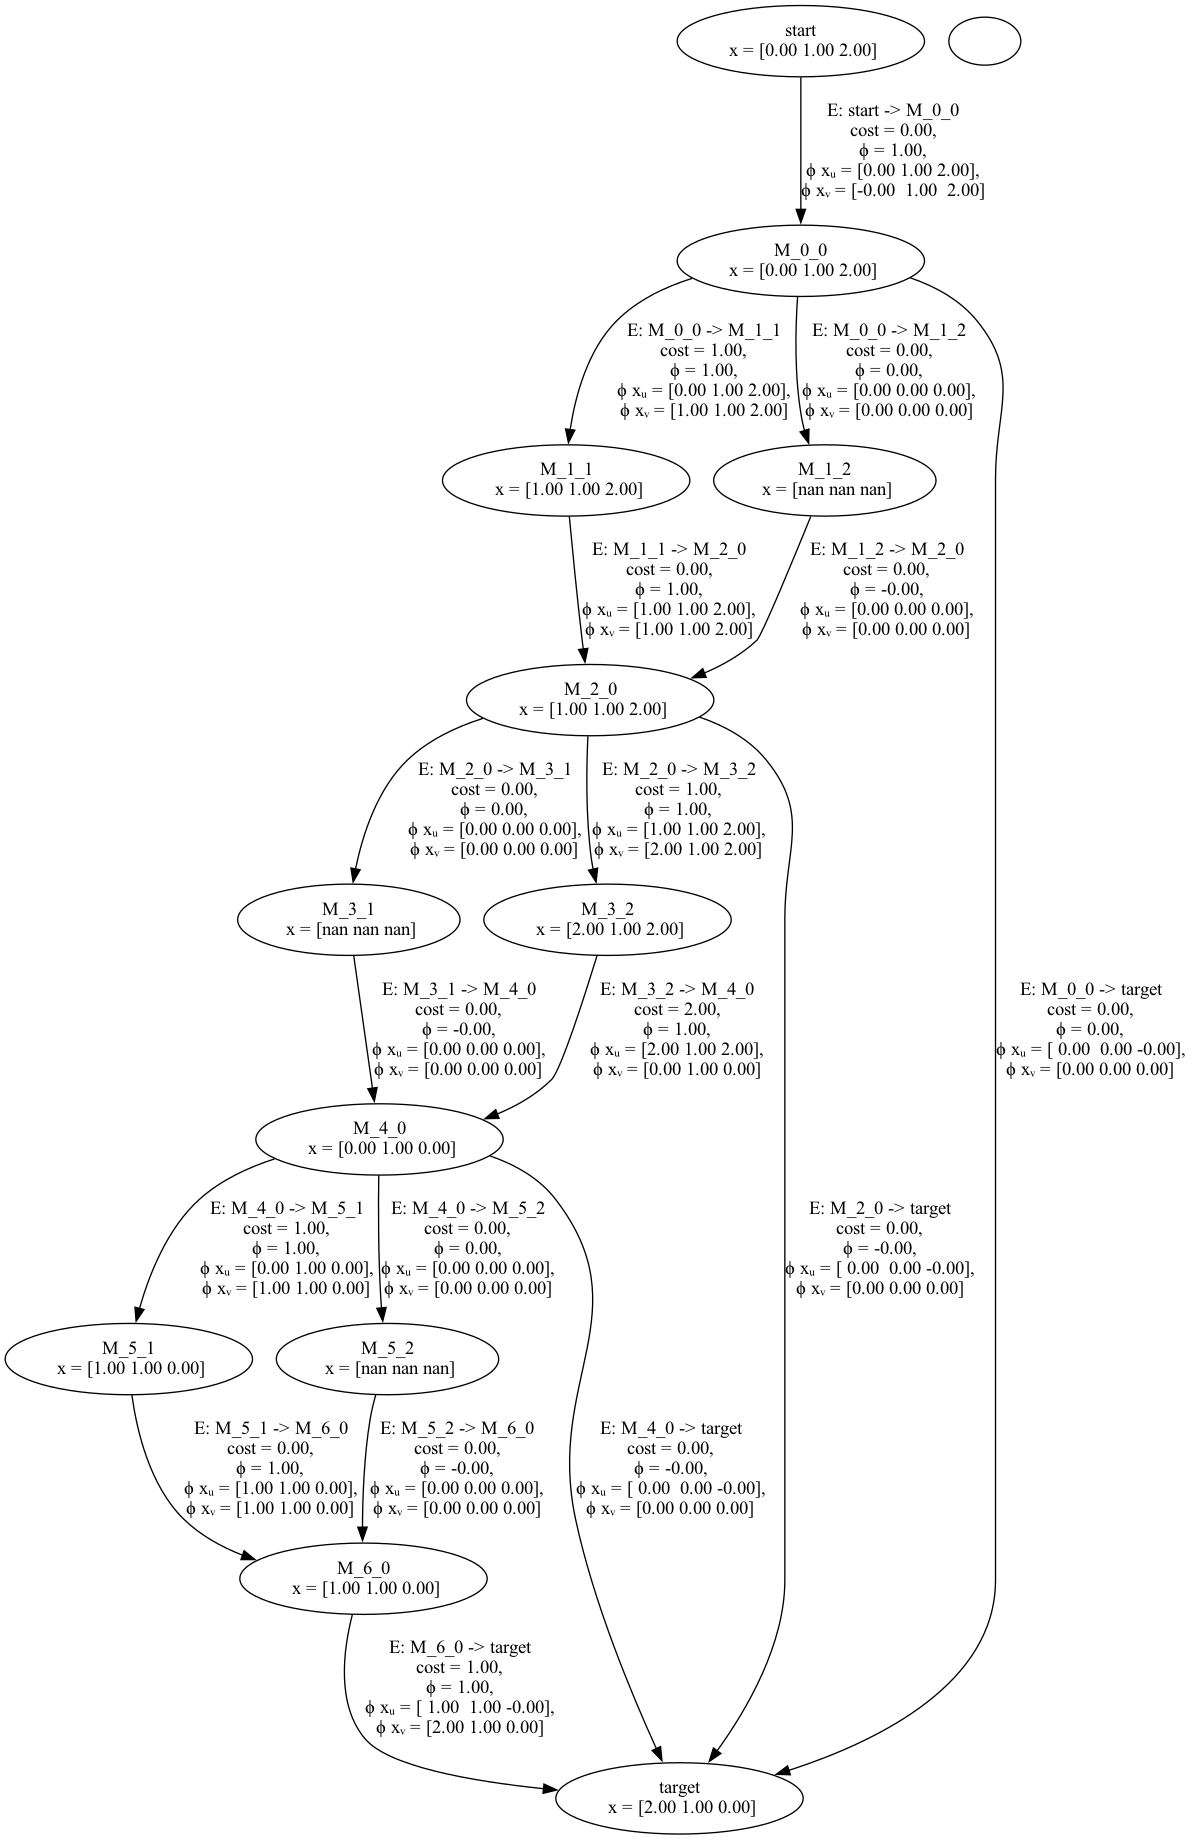

(<gcs_for_blocks.gcs.GCSforBlocks at 0x16232a8f0>,
 array([2.]),
 [2.0, 1.0, 0.0])

In [2]:
# gcs, ub, final_state= make_simple_exp(2,4,5,display_graph=True,max_rounded_paths=0)
# gcs.get_solution_path()
# make_simple_transparent_gcs_test(1,2,4, display_graph=True, max_rounded_paths=0, start_state=[0,1,2], target_state=[3,2,1], ubf=7)
# make_simple_transparent_gcs_test(1,2,4, display_graph=True, max_rounded_paths=0, start_state=[0,1,2], target_state=[3,], ubf=7)
# make_simple_exp(1,2,3, display_graph=True, max_rounded_paths=0, start_state=[2,1,2], target_state=[2,2.9,5], ubf=10)
# make_simple_exp(1,2,1, display_graph=True, max_rounded_paths=0, randomize=False)

# make_simple_transparent_gcs_test(1,50,100, use_convex_relaxation=False, display_graph=True, max_rounded_paths=0);
make_simple_transparent_gcs_test(1,2,7, use_convex_relaxation=False, display_graph=True, max_rounded_paths=0, add_grasp_cost = False)
# 
# make_simple_obstacle_swap_two();
# make_simple_obstacle_swap_two(use_convex_relaxation=True,max_rounded_paths=0)

In [ ]:
block_dim = 2
num_blocks = 3
horizon = 10
max_rounded_paths = 100
display_graph = False
use_convex_relaxation = True

gcs = GCSforBlocks(block_dim, num_blocks, horizon)

width = 1
ub = width * 2 * (num_blocks + 1)
gcs.set_block_width(width)
gcs.set_ub(ub)
gcs.no_cycles = False
gcs.problem_complexity = "transparent-no-obstacles"

initial_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[0] = width * (2 * i + 1)
    initial_state += block_state
initial_point = Point(np.array(initial_state))
final_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[-1] = ub - width * (2 * i + 1)
    final_state += block_state
final_point = Point(np.array(final_state))
gcs.build_the_graph(initial_point, 0, final_point, 0)
gcs.solve(
    use_convex_relaxation=use_convex_relaxation, max_rounded_paths=max_rounded_paths
)
gcs.verbose_solution_description()
if display_graph:
    gcs.display_graph()

In [ ]:
gcs.display_graph()
# gcs.num_gcs_sets
# gcs.sets_per_mode

In [ ]:
[1, 2, 3] + [4, 5]

In [ ]:
block_dim = 1
state_dim = 3
sample = np.ones(state_dim) * 1.5


lb = np.zeros(state_dim)
ub = np.ones(state_dim) * 2

k = 1
A = np.vstack((-np.eye(state_dim), np.eye(state_dim)))
b = np.hstack((-lb, ub))


domain = HPolyhedron(A, b)

res = Iris([HPolyhedron.MakeUnitBox(3)], sample, domain)

In [ ]:
np.vstack((np.array([]), np.eye(2)))

In [ ]:
eq_con = np.zeros((block_dim, state_dim))
eq_con[:, 0:block_dim] = np.eye(block_dim)
eq_con[:, k * block_dim : (k + 1) * block_dim] = -np.eye(block_dim)
A = np.vstack((eq_con, -eq_con))
b = np.hstack((np.zeros(block_dim), np.zeros(block_dim)))
plain = HPolyhedron(A, b)
new = res.Intersection(plain)

In [ ]:
new.A()

In [ ]:
new.b()

In [ ]:
block_dim = 1
num_blocks = 3
horizon = 10
max_rounded_paths = 30
display_graph = True

gcs = GCSforBlocks(block_dim, num_blocks, horizon)

width = 1
ub = width * 2 * (num_blocks + 1)
gcs.set_block_width(width)
gcs.set_ub(ub)

initial_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[0] = width * (2 * i + 1)
    initial_state += block_state
initial_point = Point(np.array(initial_state))
final_state = []
for i in range(gcs.num_modes):
    block_state = [0] * gcs.block_dim
    block_state[-1] = ub - width * (2 * i + 1)
    final_state += block_state
final_point = Point(np.array(final_state))
gcs.build_the_graph(initial_point, 0, final_point, 0)
gcs.solve(max_rounded_paths=max_rounded_paths)
gcs.verbose_solution_description()
if display_graph:
    gcs.display_graph()

In [ ]:
gcs.solution.get_solver_details().optimizer_time

In [ ]:
np.linalg.norm(np.array([1, 2]))